In [3]:
# Installer/mettre à jour les librairies nécessaires
!pip install --upgrade pandas scikit-learn matplotlib seaborn numpy plotly --force-reinstall

# Importer les bibliothèques
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.2.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached plotly-6.0.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none

In [4]:
# Import des bibliothèques nécessaires
import pandas as pd


# Lire le fichier train.csv et test.csv
df = pd.read_csv("train.csv")
file2 = pd.read_csv("test.csv")

# Afficher les premières lignes du dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Compter les valeurs manquantes dans chaque colonne
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
file2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Importation des bibliothèques nécessaires pour l'encodage
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Vérification si les colonnes 'Sex' et 'Embarked' existent dans le DataFrame
if 'Sex' in df.columns and 'Embarked' in df.columns:
    
    # **1. Label Encoding pour la colonne "Sex"**
    # Le LabelEncoder transforme les catégories en valeurs numériques (ex : 'male' -> 1, 'female' -> 0).
    # Cela est utile pour les modèles qui ne peuvent pas traiter des données catégorielles directement.
    label_encoder = LabelEncoder()
    df['Sex_Encoded'] = label_encoder.fit_transform(df['Sex'])  # Création d'une nouvelle colonne encodée pour "Sex"

    # **2. One-Hot Encoding pour la colonne "Embarked"**
    # Le OneHotEncoder transforme chaque valeur de la colonne en une nouvelle colonne binaire (0 ou 1) pour chaque catégorie.
    # Par exemple, la colonne "Embarked" avec les valeurs ['C', 'Q', 'S'] sera transformée en 3 nouvelles colonnes.
    one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    one_hot_encoded = one_hot_encoder.fit_transform(df[['Embarked']])  # Appliquer One-Hot Encoding sur la colonne "Embarked"

    # Convertir le tableau numpy résultant en DataFrame pour avoir des noms de colonnes clairs et compréhensibles
    # `get_feature_names_out()` génère les noms des colonnes à partir des catégories présentes dans "Embarked" (C, Q, S)
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Embarked']))

    # Ajouter les nouvelles colonnes encodées au DataFrame existant
    # Cette étape permet d'ajouter les colonnes binaires créées par One-Hot Encoding au DataFrame original
    df = pd.concat([df, one_hot_encoded_df], axis=1)

    # Supprimer les colonnes originales "Sex" et "Embarked" si elles ne sont plus nécessaires
    # Cela permet de ne conserver que les versions encodées des colonnes
    df.drop(columns=['Sex', 'Embarked'], inplace=True)

    # Afficher les premières lignes du DataFrame après l'encodage
    print("\nAprès encodage :")
    print(df.head())  # Vérifier les résultats

else:
    # Si l'une ou les deux colonnes 'Sex' ou 'Embarked' ne sont pas présentes, afficher un message d'erreur
    print("Erreur : Les colonnes 'Sex' et/ou 'Embarked' ne sont pas présentes dans le fichier CSV.")



Après encodage :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_Encoded  Embarked_C  Embarked_Q  \
0         A/5 21171   7.2500   NaN            1         0.0         0.0   
1          PC 17599  71.2833   C85            0         1.0         0.0   
2  STON/O2. 3101282   7.9250   NaN            0         0.0         0.0   
3       

In [8]:
# Vérifier les colonnes du DataFrame
print("Colonnes du DataFrame :", df.columns)

# Vérifier les valeurs manquantes avant imputation
print("\nValeurs manquantes avant imputation :")
print(df.isnull().sum())

# Imputation des colonnes numériques
if 'Age' in df.columns:
    df['Age'] = df['Age'].fillna(df['Age'].median())  # Remplace NaN par la médiane

if 'Fare' in df.columns:
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())  # Remplace NaN par la moyenne

# Vérifier si les colonnes encodées d'Embarked existent
if all(col in df.columns for col in ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']):
    print(df[['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']].head())
    df.drop(columns=['Embarked_nan'], inplace=True)

# Imputation de la colonne 'Cabin'
if 'Cabin' in df.columns:
    df['Cabin'] = df['Cabin'].fillna('Unknown')  # Remplace NaN par "Unknown"

# Vérifier les valeurs manquantes après imputation
print("\nValeurs manquantes après imputation :")
print(df.isnull().sum())


Colonnes du DataFrame : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_Encoded', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Embarked_nan'],
      dtype='object')

Valeurs manquantes avant imputation :
PassengerId       0
Survived          0
Pclass            0
Name              0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Sex_Encoded       0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Embarked_nan      0
dtype: int64
   Embarked_C  Embarked_Q  Embarked_S  Embarked_nan
0         0.0         0.0         1.0           0.0
1         1.0         0.0         0.0           0.0
2         0.0         0.0         1.0           0.0
3         0.0         0.0         1.0           0.0
4         0.0         0.0         1.0           0.0

Valeurs manquantes après imputation :
PassengerId    0
Survived       0
Pclass         0
Name    

In [9]:
scaler = StandardScaler()  # Centrage-réduction (moyenne=0, variance=1)

# Liste des variables numériques à transformer
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Appliquer le scaler sur les colonnes sélectionnées
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Vérification après transformation
print(df[numerical_features].describe())  # Vérifier les nouvelles valeurs

                Age          Fare         SibSp         Parch
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18  4.386066e-17  5.382900e-17
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01 -4.745452e-01 -4.736736e-01
25%   -5.657365e-01 -4.891482e-01 -4.745452e-01 -4.736736e-01
50%   -1.046374e-01 -3.573909e-01 -4.745452e-01 -4.736736e-01
75%    4.333115e-01 -2.424635e-02  4.327934e-01 -4.736736e-01
max    3.891554e+00  9.667167e+00  6.784163e+00  6.974147e+00


In [10]:
#1. Statistiques descriptives
print(df.describe())  # Moyenne, médiane, quartiles, etc.
print(df.info())  # Vérifier les types de données et les valeurs manquantes
print(df.isnull().sum())  # Vérifier les valeurs manquantes

       PassengerId    Survived      Pclass           Age         SibSp  \
count   891.000000  891.000000  891.000000  8.910000e+02  8.910000e+02   
mean    446.000000    0.383838    2.308642  2.272780e-16  4.386066e-17   
std     257.353842    0.486592    0.836071  1.000562e+00  1.000562e+00   
min       1.000000    0.000000    1.000000 -2.224156e+00 -4.745452e-01   
25%     223.500000    0.000000    2.000000 -5.657365e-01 -4.745452e-01   
50%     446.000000    0.000000    3.000000 -1.046374e-01 -4.745452e-01   
75%     668.500000    1.000000    3.000000  4.333115e-01  4.327934e-01   
max     891.000000    1.000000    3.000000  3.891554e+00  6.784163e+00   

              Parch          Fare  Sex_Encoded  Embarked_C  Embarked_Q  \
count  8.910000e+02  8.910000e+02   891.000000  891.000000  891.000000   
mean   5.382900e-17  3.987333e-18     0.647587    0.188552    0.086420   
std    1.000562e+00  1.000562e+00     0.477990    0.391372    0.281141   
min   -4.736736e-01 -6.484217e-01    

<Figure size 1200x800 with 0 Axes>

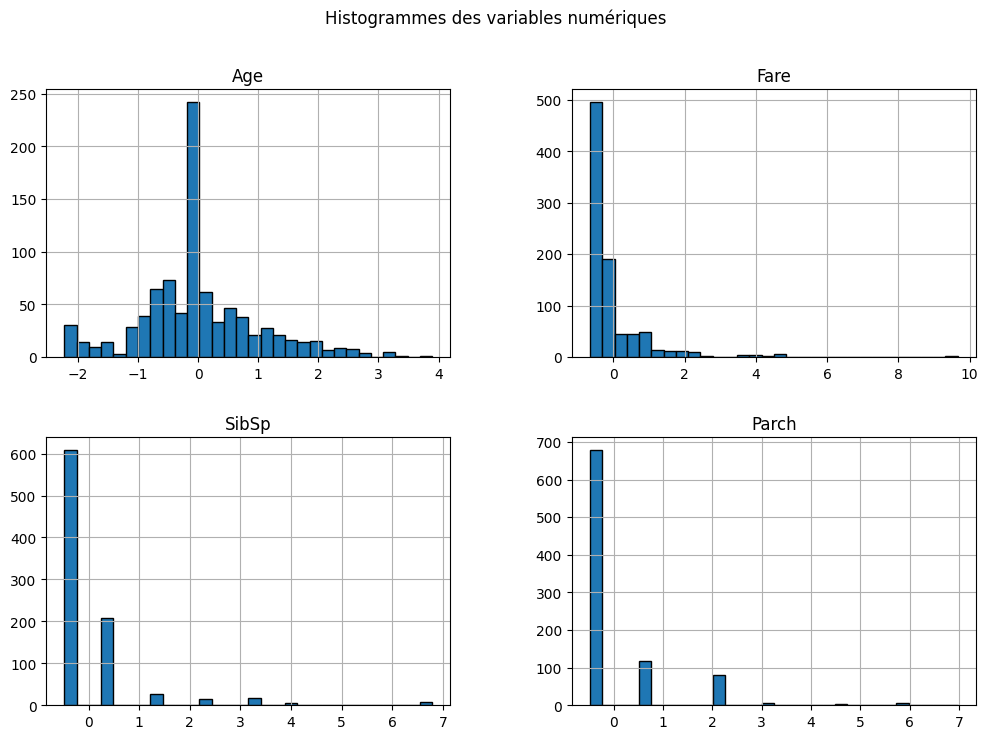

In [11]:
# Histogrammes pour toutes les variables numériques
plt.figure(figsize=(12, 8))
df[['Age', 'Fare', 'SibSp', 'Parch']].hist(bins=30, edgecolor='black', figsize=(12, 8))
plt.suptitle('Histogrammes des variables numériques')
plt.show()


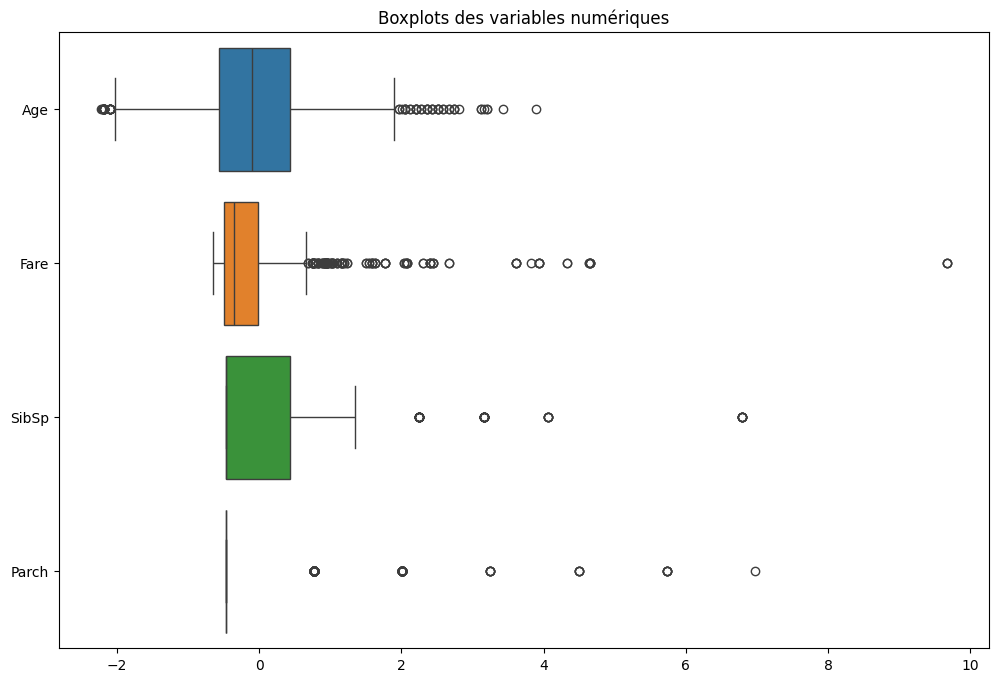

In [12]:
# Boxplot pour toutes les variables numériques
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']], orient='h')
plt.title('Boxplots des variables numériques')
plt.show()


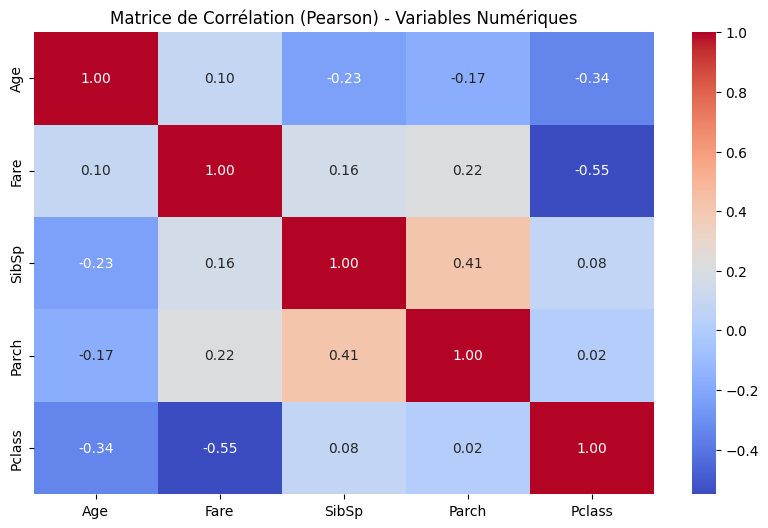

In [13]:
# Sélection des variables numériques
num_features = ["Age", "Fare", "SibSp", "Parch", "Pclass"]  # Pclass est ordinal, on peut le considérer ici aussi

# Matrice de corrélation Pearson
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Pearson) - Variables Numériques")
plt.show()


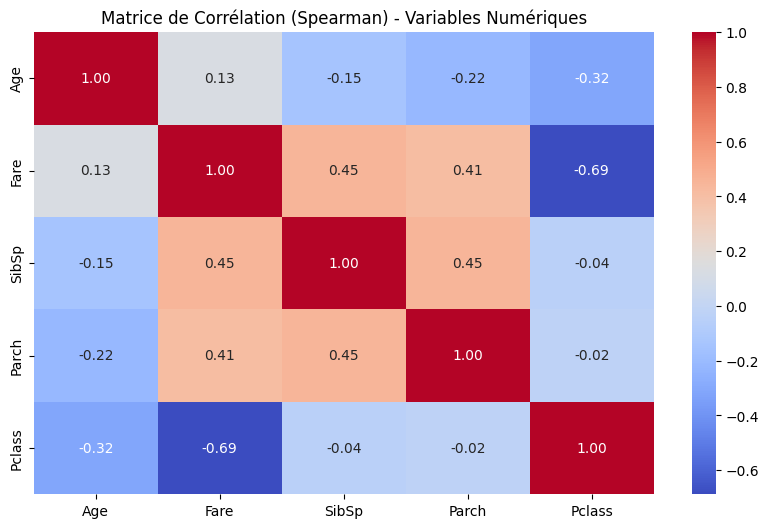

In [14]:
# Matrice de corrélation Spearman (utile si les relations ne sont pas linéaires)
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Spearman) - Variables Numériques")
plt.show()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_Encoded', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


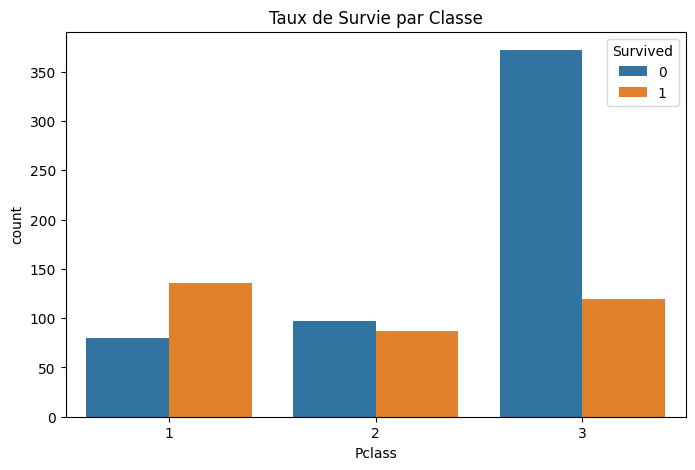

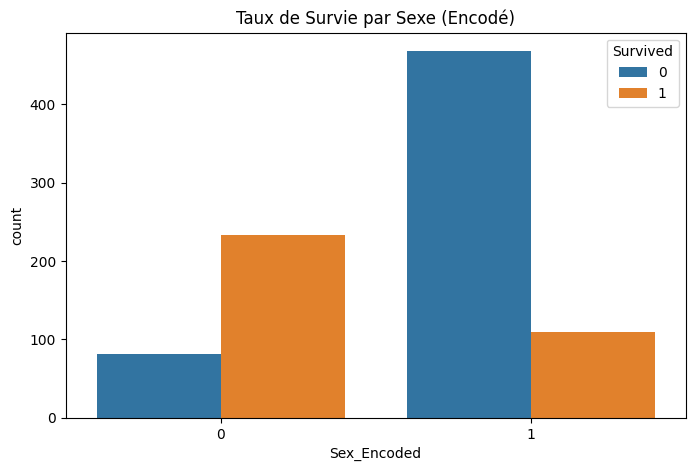

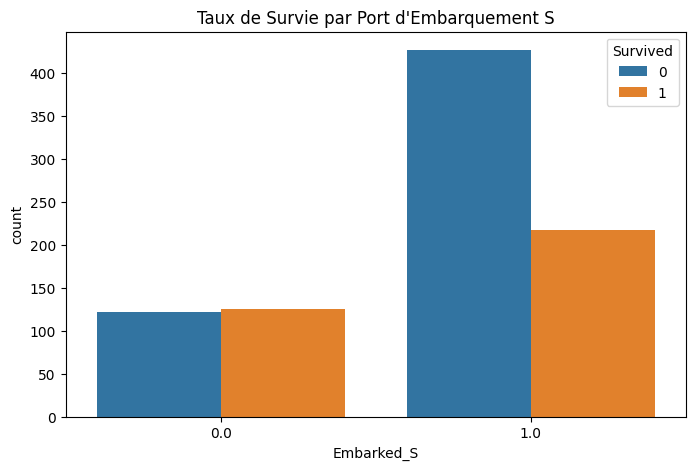

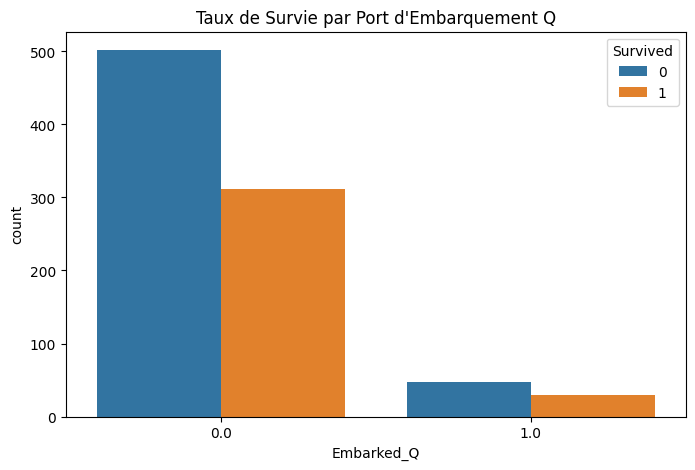

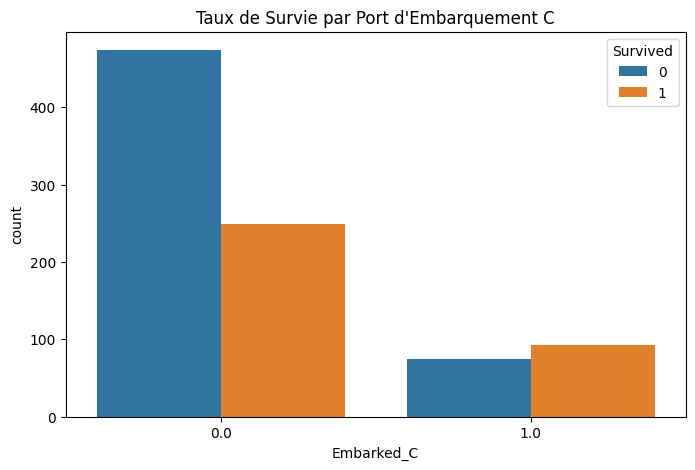

In [15]:
# Countplot pour voir la répartition des survivants selon la classe
plt.figure(figsize=(8, 5))
print(df.columns)

sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Taux de Survie par Classe")
plt.show()

# Countplot pour voir la répartition des survivants selon le sexe
plt.figure(figsize=(8, 5))
sns.countplot(x="Sex_Encoded", hue="Survived", data=df)
plt.title("Taux de Survie par Sexe (Encodé)")
plt.show()

# Countplot pour voir la répartition des survivants selon le port d'embarquement
plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked_S", hue="Survived", data=df)
plt.title("Taux de Survie par Port d'Embarquement S")
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked_Q", hue="Survived", data=df)
plt.title("Taux de Survie par Port d'Embarquement Q")
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked_C", hue="Survived", data=df)
plt.title("Taux de Survie par Port d'Embarquement C")
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

df_final = df[['Survived', 'Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Afficher le DataFrame final
print(df_final.head())

   Survived  Pclass  Sex_Encoded       Age      Fare     SibSp     Parch  \
0         0       3            1 -0.565736 -0.502445  0.432793 -0.473674   
1         1       1            0  0.663861  0.786845  0.432793 -0.473674   
2         1       3            0 -0.258337 -0.488854 -0.474545 -0.473674   
3         1       1            0  0.433312  0.420730  0.432793 -0.473674   
4         0       3            1  0.433312 -0.486337 -0.474545 -0.473674   

   Embarked_C  Embarked_Q  Embarked_S  
0         0.0         0.0         1.0  
1         1.0         0.0         0.0  
2         0.0         0.0         1.0  
3         0.0         0.0         1.0  
4         0.0         0.0         1.0  


In [20]:
# Importation des librairies nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement des données (assurez-vous que df est déjà défini)
# df = pd.read_csv('train.csv')  # Exemple de chargement des données

# Sélection des algorithmes
models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Assurez-vous que SVC puisse donner des probabilités
    "Naive Bayes": GaussianNB(),
    "Réseaux de neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# Séparation des données en X (features) et y (cible)
X = df[['Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Séparation du dataset en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apprentissage et prédiction pour chaque modèle
results = {}
for name, model in models.items():
    # Cross-validation à 5, 7 et 10 folds
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Assurez-vous que c'est un problème binaire
    recall = recall_score(y_test, y_pred, average='binary')  # Pareil pour recall
    f1 = f1_score(y_test, y_pred, average='binary')  # Pareil pour F1
    # Pour AUC-ROC, utiliser les probabilités prédites pour SVC et les autres modèles compatibles
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe positive
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)  # Utilisation de y_pred si le modèle ne supporte pas predict_proba

    # Stockage des résultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)


                        CV (5 folds)  CV (7 folds)  CV (10 folds)  Accuracy  \
Régression Logistique       0.797703      0.796148       0.792908  0.809701   
Arbre de Décision           0.760903      0.764045       0.794675  0.776119   
Forêt Aléatoire             0.781832      0.804173       0.810829  0.783582   
K-Nearest Neighbors         0.797729      0.794543       0.796057  0.791045   
Support Vector Machine      0.831419      0.834671       0.834665  0.817164   
Naive Bayes                 0.768826      0.776886       0.778520  0.794776   
Réseaux de neurones         0.796129      0.812199       0.805684  0.813433   

                        Precision    Recall  F1 Score   AUC-ROC  
Régression Logistique    0.794118  0.729730  0.760563  0.879956  
Arbre de Décision        0.738318  0.711712  0.724771  0.765708  
Forêt Aléatoire          0.747664  0.720721  0.733945  0.862283  
K-Nearest Neighbors      0.795699  0.666667  0.725490  0.857348  
Support Vector Machine   0.869048  0.

In [21]:
# Importation des librairies nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement des données (assurez-vous que df est déjà défini)
# df = pd.read_csv('train.csv')  # Exemple de chargement des données

# Sélection des algorithmes
models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Assurez-vous que SVC puisse donner des probabilités
    "Naive Bayes": GaussianNB(),
    "Réseaux de neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# Séparation des données en X (features) et y (cible)
X = df[['Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Séparation du dataset en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apprentissage et prédiction pour chaque modèle
results = {}
for name, model in models.items():
    # Cross-validation à 5, 7 et 10 folds
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Assurez-vous que c'est un problème binaire
    recall = recall_score(y_test, y_pred, average='binary')  # Pareil pour recall
    f1 = f1_score(y_test, y_pred, average='binary')  # Pareil pour F1
    # Pour AUC-ROC, utiliser les probabilités prédites pour SVC et les autres modèles compatibles
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe positive
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)  # Utilisation de y_pred si le modèle ne supporte pas predict_proba

    # Stockage des résultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)


                        CV (5 folds)  CV (7 folds)  CV (10 folds)  Accuracy  \
Régression Logistique       0.797703      0.796148       0.792908  0.809701   
Arbre de Décision           0.756090      0.759230       0.786636  0.761194   
Forêt Aléatoire             0.791419      0.800963       0.805888  0.794776   
K-Nearest Neighbors         0.797729      0.794543       0.796057  0.791045   
Support Vector Machine      0.831419      0.834671       0.834665  0.817164   
Naive Bayes                 0.768826      0.776886       0.778520  0.794776   
Réseaux de neurones         0.796129      0.802568       0.807296  0.820896   

                        Precision    Recall  F1 Score   AUC-ROC  
Régression Logistique    0.794118  0.729730  0.760563  0.879956  
Arbre de Décision        0.719626  0.693694  0.706422  0.749469  
Forêt Aléatoire          0.759259  0.738739  0.748858  0.861881  
K-Nearest Neighbors      0.795699  0.666667  0.725490  0.857348  
Support Vector Machine   0.869048  0.

In [24]:
# Importation des librairies nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement des données (assurez-vous que df est déjà défini)
# df = pd.read_csv('train.csv')  # Exemple de chargement des données

# Sélection des algorithmes
models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Assurez-vous que SVC puisse donner des probabilités
    "Naive Bayes": GaussianNB(),
    "Réseaux de neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# Séparation des données en X (features) et y (cible)
X = df[['Pclass', 'Sex_Encoded', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

# Séparation du dataset en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apprentissage et prédiction pour chaque modèle
results = {}
for name, model in models.items():
    # Cross-validation à 5, 7 et 10 folds
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Assurez-vous que c'est un problème binaire
    recall = recall_score(y_test, y_pred, average='binary')  # Pareil pour recall
    f1 = f1_score(y_test, y_pred, average='binary')  # Pareil pour F1
    # Pour AUC-ROC, utiliser les probabilités prédites pour SVC et les autres modèles compatibles
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe positive
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)  # Utilisation de y_pred si le modèle ne supporte pas predict_proba

    # Stockage des résultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)


                        CV (5 folds)  CV (7 folds)  CV (10 folds)  Accuracy  \
Régression Logistique       0.797703      0.796148       0.792908  0.809701   
Arbre de Décision           0.754490      0.767255       0.788274  0.757463   
Forêt Aléatoire             0.789806      0.789727       0.804301  0.772388   
K-Nearest Neighbors         0.797729      0.794543       0.796057  0.791045   
Support Vector Machine      0.831419      0.834671       0.834665  0.817164   
Naive Bayes                 0.768826      0.776886       0.778520  0.794776   
Réseaux de neurones         0.800942      0.810594       0.813646  0.809701   

                        Precision    Recall  F1 Score   AUC-ROC  
Régression Logistique    0.794118  0.729730  0.760563  0.879956  
Arbre de Décision        0.712963  0.693694  0.703196  0.746170  
Forêt Aléatoire          0.735849  0.702703  0.718894  0.856917  
K-Nearest Neighbors      0.795699  0.666667  0.725490  0.857348  
Support Vector Machine   0.869048  0.

In [25]:
# Installer/mettre à jour les librairies nécessaires
!pip install --upgrade pandas scikit-learn matplotlib seaborn numpy plotly --force-reinstall

# Import des bibliothèques nécessaires
import pandas as pf

# Importer les bibliothèques
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler


  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.2.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached plotly-6.0.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none

In [26]:
# Lire le fichier
df = pf.read_csv("bank-additional-full.csv", sep=";")

# Afficher toutes les colonnes sans coupure
pf.set_option("display.max_columns", None)

# Afficher les premières lignes du dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
# Lire le fichier bank-additional-full.csv
df = pf.read_csv("bank-additional-full.csv", sep=";")

# Vérifier toutes les colonnes (catégorielles et numériques)
all_columns = df.columns

# Rechercher "unknown" dans toutes les colonnes
unknown_counts = df[all_columns].apply(lambda col: (col.astype(str) == "unknown").sum())

# Affichage des résultats pour toutes les colonnes, même celles sans "unknown"
print("Nombre de valeurs 'unknown' dans chaque colonne :")
print(unknown_counts)


Nombre de valeurs 'unknown' dans chaque colonne :
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [28]:
# Identifier les colonnes catégorielles
categorical_columns = df.select_dtypes(include=["object"]).columns

# Liste des colonnes à encoder avec One-Hot Encoding
one_hot_cols = ["job", "marital", "contact", "month", "day_of_week"]

# Liste des colonnes à encoder avec Label Encoding (optionnel)
label_cols = ["education"]  # Si l'on veut encoder les niveaux d'éducation dans un ordre

# Appliquer One-Hot Encoding sans modifier les "unknown"
df_encoded = df.copy()
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

for col in one_hot_cols:
    # Remplacer temporairement "unknown" par une valeur unique
    temp_col = df_encoded[col].replace("unknown", "TO_KEEP")
    
    # Appliquer One-Hot Encoding
    encoded_values = encoder.fit_transform(temp_col.values.reshape(-1, 1))
    encoded_df = pf.DataFrame(encoded_values, columns=encoder.get_feature_names_out([col]))
    
    # Restaurer les "unknown"
    encoded_df[temp_col == "TO_KEEP"] = 0  # On met 0 pour éviter un biais d'encodage
    
    # Ajouter au DataFrame original
    df_encoded = pf.concat([df_encoded, encoded_df], axis=1)
    
    # Supprimer l'ancienne colonne
    df_encoded.drop(columns=[col], inplace=True)

# Appliquer Label Encoding si nécessaire
for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].apply(lambda x: x if x == "unknown" else le.fit_transform([x])[0])

# Afficher les premières lignes du DataFrame encodé
df_encoded

,age,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,no,no,no,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,57,0,unknown,no,no,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37,0,no,yes,no,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,0,no,no,no,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,56,0,no,no,yes,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,no,yes,no,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41184,46,0,no,no,no,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41185,56,0,no,yes,no,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
41186,44,0,no,no,no,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Identifier les colonnes catégorielles
categorical_columns = df.select_dtypes(include=["object"]).columns

# Liste des colonnes à encoder avec One-Hot Encoding
one_hot_cols = ["job", "marital", "contact", "poutcome", "month", "day_of_week"]

# Liste des colonnes à encoder avec Label Encoding (optionnel)
label_cols = ["education"]  # Si l'on veut encoder les niveaux d'éducation dans un ordre

# Copier le DataFrame pour l'encodage
df_encoded = df.copy()

# Appliquer One-Hot Encoding sans modifier les "unknown"
encoder = OneHotEncoder(drop="first", sparse_output=False)

for col in one_hot_cols:
    # Séparer les valeurs "unknown" pour les préserver
    mask_unknown = df_encoded[col] == "unknown"
    
    # Appliquer One-Hot Encoding sur les valeurs connues
    temp_col = df_encoded[~mask_unknown][col].to_numpy().reshape(-1, 1)
    encoded_values = encoder.fit_transform(temp_col)
    encoded_df = pf.DataFrame(encoded_values, columns=encoder.get_feature_names_out([col]), index=df_encoded[~mask_unknown].index)
    
    # Remettre "unknown" dans la colonne originale
    df_encoded[col] = df_encoded[col].replace("unknown", "TO_KEEP")
    
    # Fusionner les nouvelles colonnes
    df_encoded = df_encoded.join(encoded_df)
    
    # Restaurer les valeurs "unknown"
    df_encoded[col] = df_encoded[col].replace("TO_KEEP", "unknown")

# Appliquer Label Encoding si nécessaire, sans modifier les "unknown"
for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].apply(lambda x: le.fit_transform([x])[0] if x != "unknown" else x)

# Afficher les premières lignes du DataFrame encodé
print(" Aperçu du dataset après encodage :")
print(df_encoded.head())

# Vérifier que les valeurs "unknown" sont toujours présentes
unknown_counts_after = df_encoded.apply(lambda col: (col == "unknown").sum())

# Afficher uniquement les colonnes qui contiennent encore des valeurs "unknown"
print("\n Nombre de valeurs 'unknown' par colonne après encodage :")
print(unknown_counts_after[unknown_counts_after > 0])

 Aperçu du dataset après encodage :
   age        job  marital education  default housing loan    contact month  \
0   56  housemaid  married         0       no      no   no  telephone   may   
1   57   services  married         0  unknown      no   no  telephone   may   
2   37   services  married         0       no     yes   no  telephone   may   
3   40     admin.  married         0       no      no   no  telephone   may   
4   56   services  married         0       no      no  yes  telephone   may   

  day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon       261         1    999         0  nonexistent           1.1   
1         mon       149         1    999         0  nonexistent           1.1   
2         mon       226         1    999         0  nonexistent           1.1   
3         mon       151         1    999         0  nonexistent           1.1   
4         mon       307         1    999         0  nonexistent           1.1   

  

In [30]:
# Identifier les colonnes avec des valeurs "unknown"
unknown_columns = df_encoded.columns[df_encoded.apply(lambda col: (col == "unknown").sum() > 0)]

# Copier le DataFrame pour imputer les valeurs manquantes
df_imputed = df_encoded.copy()

# Imputer les valeurs manquantes (remplacer "unknown" par la valeur la plus fréquente)
for col in unknown_columns:
    most_frequent_value = df_imputed[col].mode()[0]  # Trouver la valeur la plus fréquente
    df_imputed[col] = df_imputed[col].replace("unknown", most_frequent_value).infer_objects(copy=False)  # Correction

# Afficher les valeurs "unknown" restantes (vérification)
unknown_counts_after_imputation = df_imputed.apply(lambda col: (col == "unknown").sum())

# Affichage des résultats
print("\n🚀 Nombre de valeurs 'unknown' après imputation :")
print(unknown_counts_after_imputation[unknown_counts_after_imputation > 0])



🚀 Nombre de valeurs 'unknown' après imputation :
Series([], dtype: int64)


/var/folders/14/w4r1_bmn3nq1j_w5kgsp72nh0000gp/T/ipykernel_97783/3779386493.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_imputed[col] = df_imputed[col].replace("unknown", most_frequent_value).infer_objects(copy=False)  # Correction


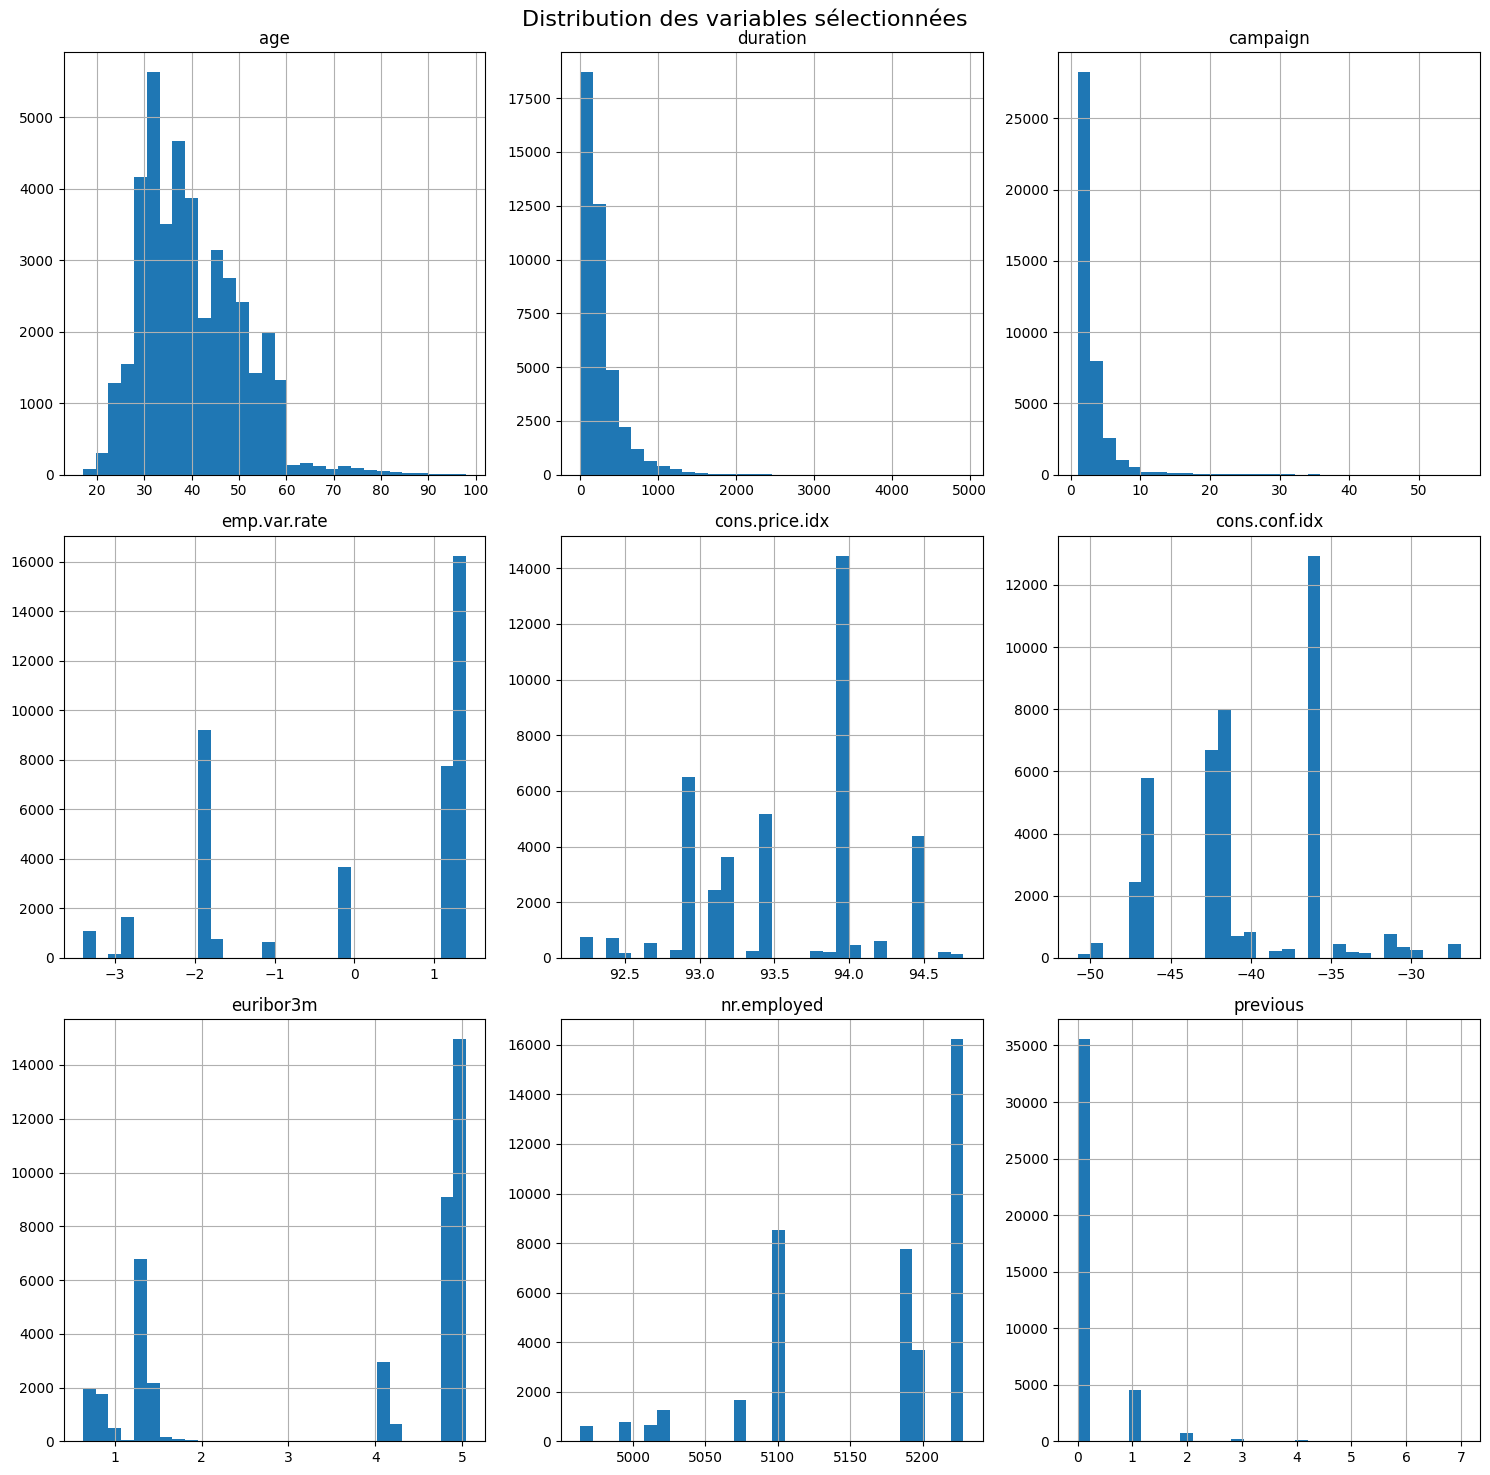

In [31]:
# Import des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sélection des colonnes spécifiques
selected_columns = ["age", "duration", "campaign", "emp.var.rate", 
                    "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "previous"]

# Déterminer dynamiquement le nombre de lignes et de colonnes pour l'affichage
num_cols = len(selected_columns)
num_rows = int(np.ceil(num_cols / 3))  # 3 colonnes par ligne

# Tracer les histogrammes
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Convertir la grille en une liste d'axes

for i, col in enumerate(selected_columns):
    df_imputed[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(col)

# Supprimer les axes inutilisés si le nombre de colonnes < nombre de sous-graphiques
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Distribution des variables sélectionnées", fontsize=16)
plt.tight_layout()
plt.show()


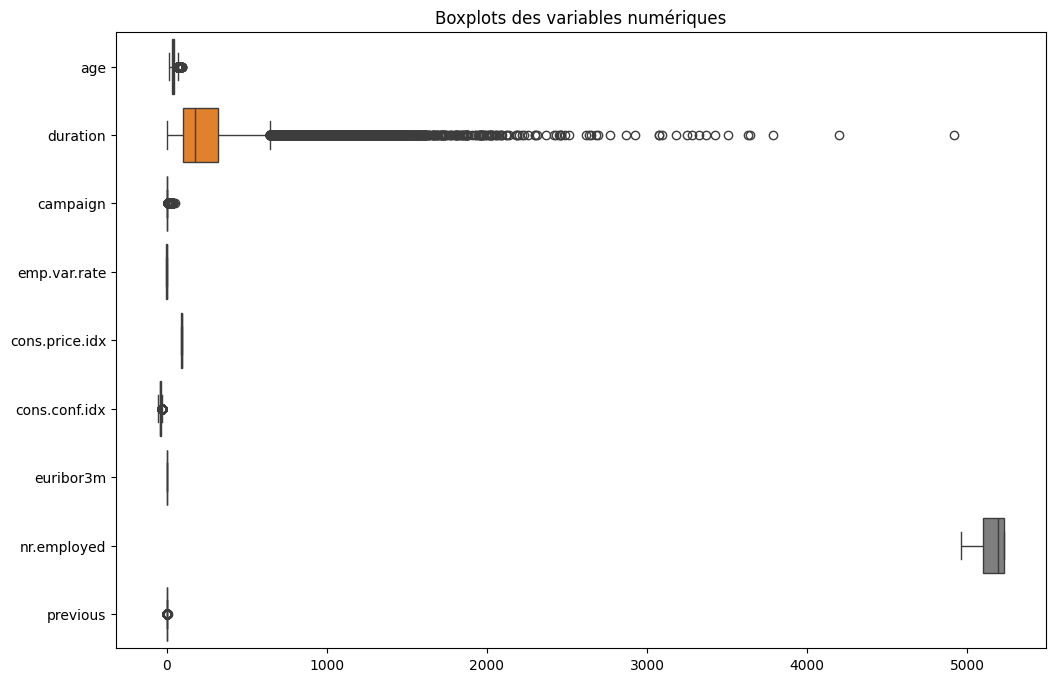

In [32]:
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes spécifiques pour le boxplot
selected_columns = ["age", "duration", "campaign", "emp.var.rate", 
                    "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "previous"]


# Boxplot pour toutes les variables numériques
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[selected_columns], orient='h')
plt.title('Boxplots des variables numériques')
plt.show()


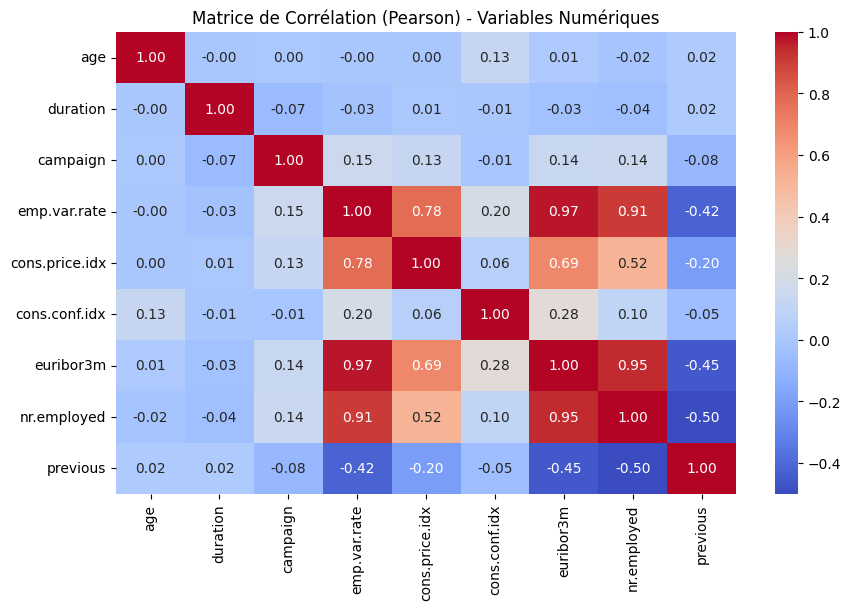

In [33]:
# Sélection des variables numériques
selected_columns = ["age", "duration", "campaign", "emp.var.rate", 
                    "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "previous"]

# Matrice de corrélation Pearson
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_columns].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Pearson) - Variables Numériques")
plt.show()

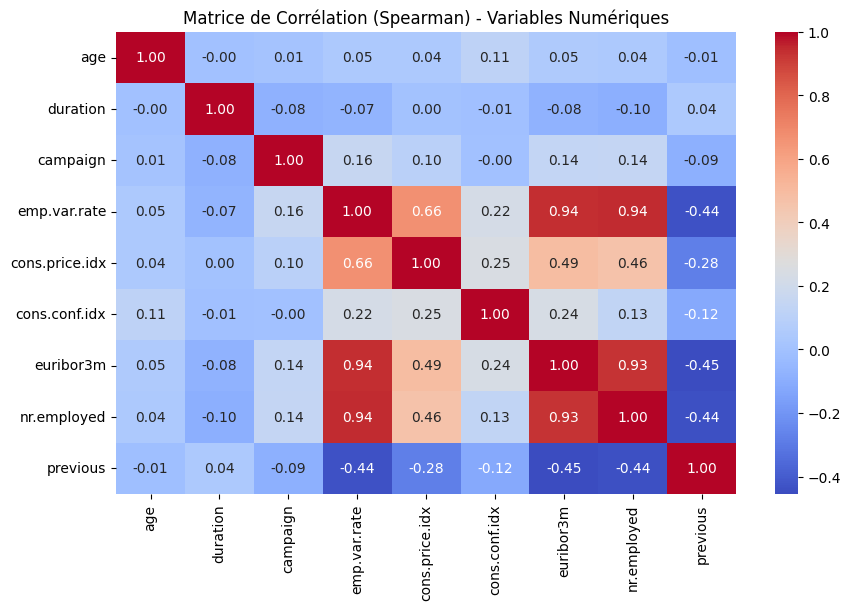

In [34]:
# Matrice de corrélation Spearman (utile si les relations ne sont pas linéaires)
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_columns].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation (Spearman) - Variables Numériques")
plt.show()

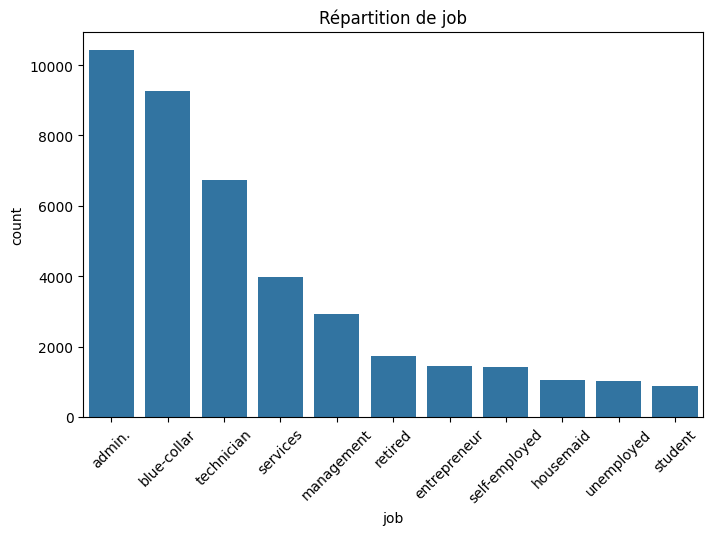

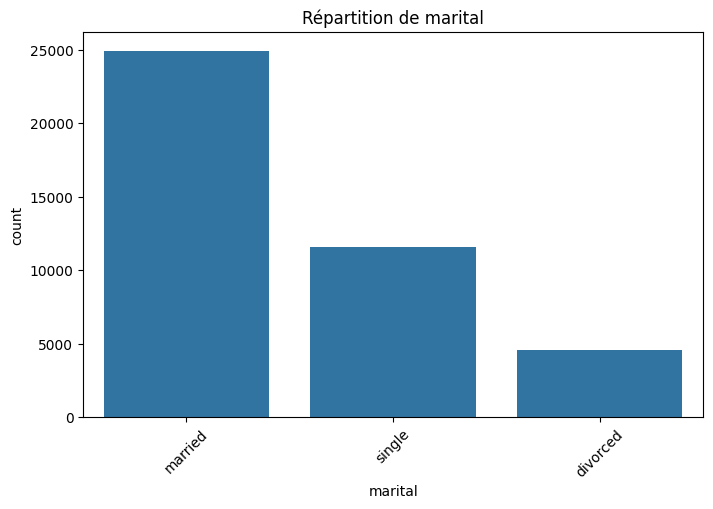

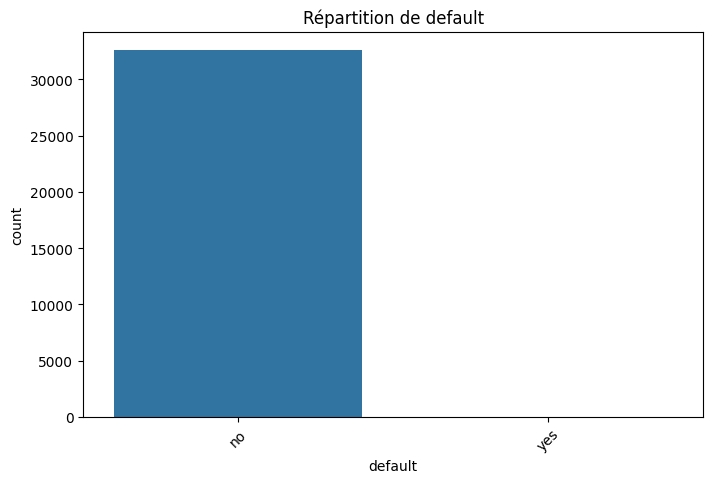

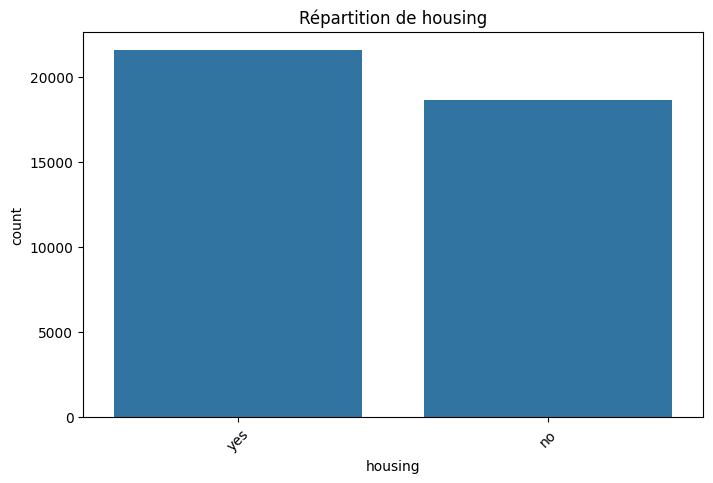

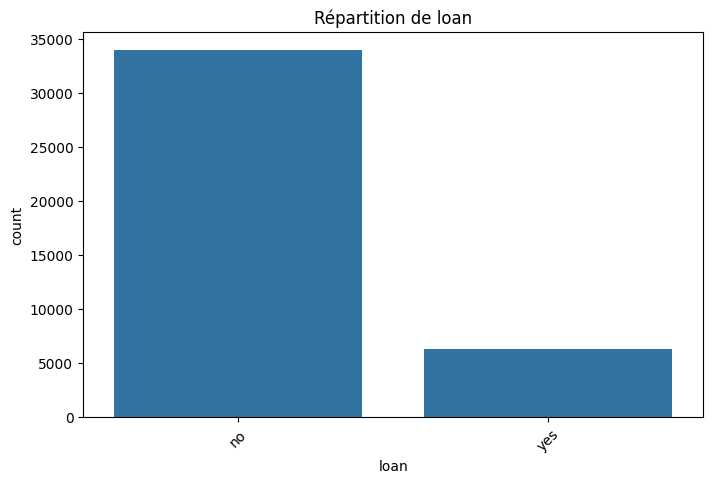

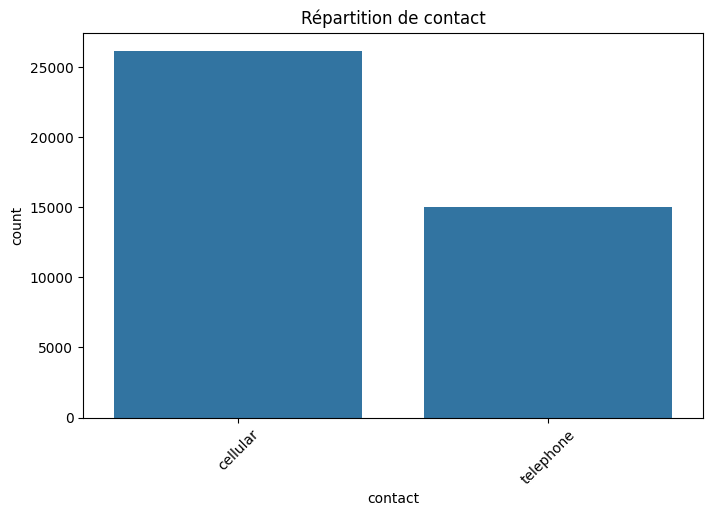

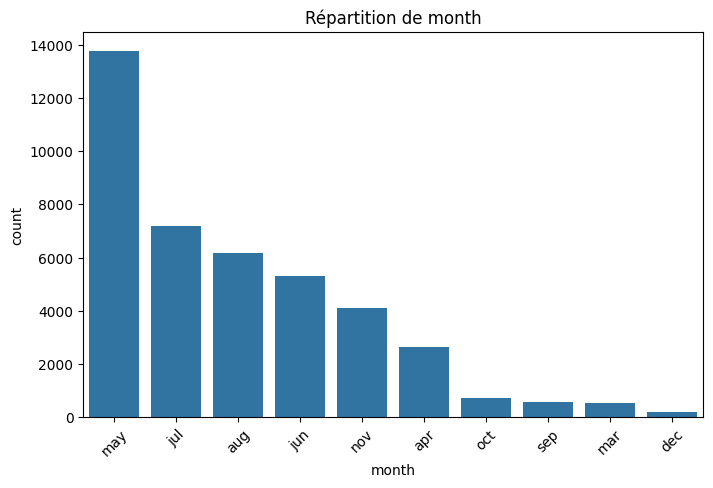

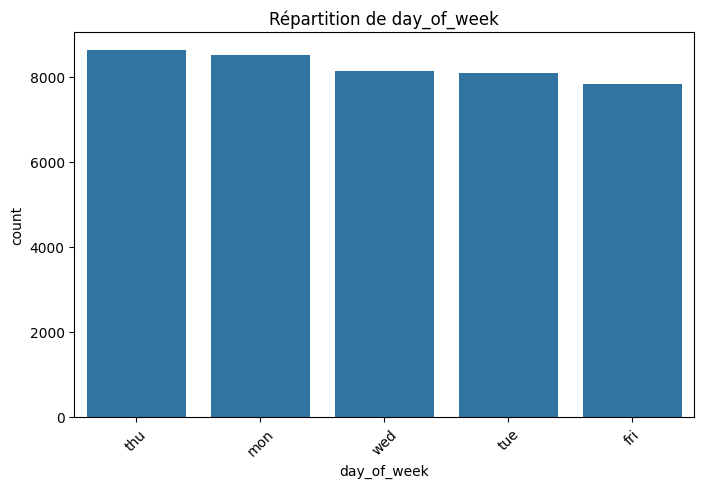

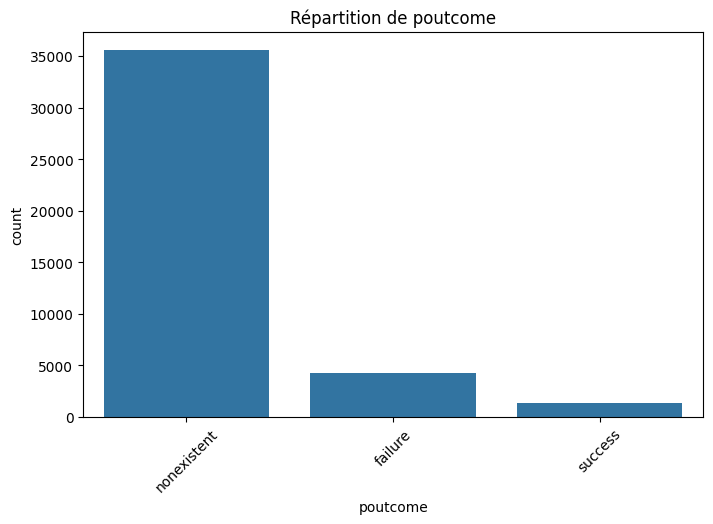

In [35]:
# Import des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes catégorielles restantes (non utilisées précédemment)
categorical_columns = df_imputed.select_dtypes(include=["object"]).columns
unused_columns = [col for col in categorical_columns if col not in selected_columns + ["y"]]

# Tracer des countplots pour chaque colonne catégorielle restante
for col in unused_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, order=df_imputed[col].value_counts().index)
    plt.title(f"Répartition de {col}")
    plt.xticks(rotation=45)  # Rotation des étiquettes si nécessaire
    plt.show()

In [36]:
# Importation des librairies nécessaires
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chargement des données (assurez-vous que df est déjà défini)
# df = pd.read_csv('train.csv')  # Exemple de chargement des données

# Sélection des algorithmes
models = {
    "Régression Logistique": LogisticRegression(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "Forêt Aléatoire": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Assurez-vous que SVC puisse donner des probabilités
    "Naive Bayes": GaussianNB(),
    "Réseaux de neurones": MLPClassifier(max_iter=5000, solver='adam', learning_rate_init=0.001)
}

# Séparation des données en X (features) et y (cible)
X = df[['emp.var.rate', 'cons.conf.idx', 'job', 'education', 'duration', 'campaign', 'housing', 'loan', 'pdays', 'euribor3m', 'nr.employed', 'cons.price.idx', 'contact', 'month', 'previous', 'poutcome', 'day_of_week']]
y = df['y']

# Séparation du dataset en train (70%) et test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apprentissage et prédiction pour chaque modèle
results = {}
for name, model in models.items():
    # Cross-validation à 5, 7 et 10 folds
    cv_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_7 = cross_val_score(model, X_train_scaled, y_train, cv=7, scoring='accuracy').mean()
    cv_10 = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()

    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Assurez-vous que c'est un problème binaire
    recall = recall_score(y_test, y_pred, average='binary')  # Pareil pour recall
    f1 = f1_score(y_test, y_pred, average='binary')  # Pareil pour F1
    # Pour AUC-ROC, utiliser les probabilités prédites pour SVC et les autres modèles compatibles
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilité pour la classe positive
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = roc_auc_score(y_test, y_pred)  # Utilisation de y_pred si le modèle ne supporte pas predict_proba

    # Stockage des résultats
    results[name] = {
        "CV (5 folds)": cv_5,
        "CV (7 folds)": cv_7,
        "CV (10 folds)": cv_10,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC-ROC": auc
    }

# Affichage des résultats
results_df = pd.DataFrame(results).T
print(results_df)

ValueError: could not convert string to float: 'admin.'

In [ ]:
bh